## Loan Disbursement & Repayment Analysis

## Problem Statement

A company aims to expand into the unbanked and under-banked market by acquiring a strategic lending business. The target company has provided data on their loan disbursements and repayments. The goal is to analyze this data to evaluate the product’s performance, identify trends, and provide actionable recommendations. 

Key objectives include assessing loan disbursement and repayment behavior, forecasting 3-month profit/loss, and recommending strategies to optimize profitability and manage credit risk.

### Comprehensive Analysis of Loan Disbursements and Repayments

### 1. **Disbursement Data Analysis**

#### 1.1 **Total Loan Amount and Loan Fee Analysis**
- **Objective**: Calculate the total loan amount disbursed across all customers and analyze the associated loan fees.
- **Key Metrics**: 
  - Total loan amount
  - Average loan fee

#### 1.2 **Loan Amount by Customer**
- **Objective**: Analyze the distribution of loan amounts per customer to understand the variation and identify trends.
- **Key Metrics**:
  - Loan amount per customer

#### 1.3 **Loan Amount by Tenure**
- **Objective**: Examine how loan amounts vary across different tenures (e.g., 6 months, 12 months).
- **Key Metrics**:
  - Loan amount by tenure

### 2. **Repayment Data Analysis**

#### 2.1 **Repayment Trends Over Time**
- **Objective**: Analyze the repayment trends over time to identify any seasonal fluctuations or patterns in repayment behavior.
- **Key Metrics**:
  - Repayment amount by month/year
  - Changes in repayment behavior over time

#### 2.2 **Repayment by Customer**
- **Objective**: Understand the average repayment per customer and assess repayment behavior.
- **Key Metrics**:
  - Average repayment amount per customer

### 3. **Holistic Analysis (Joining Disbursements and Repayments Tables)**

#### 3.1 **Repayment Performance**
- **Objective**: Analyze customers who have higher loan amounts and compare them to their repayment behavior (on-time vs. late).
- **Key Metrics**:
  - Repayment rate by loan amount
  - Repayment behavior by customer

#### 3.2 **Product Performance Evaluation**
- **Objective**: Assess the overall success of the loan product by comparing disbursed amounts to repaid amounts.
- **Key Metrics**:
  - Total disbursed vs total repaid across all customers
  - Repayment success rate

#### 3.3 **Loan Repayment Ratio**
- **Objective**: Understand how much of the loan disbursed has been repaid by calculating the repayment ratio.
- **Key Metrics**:
  - Repayment ratio (total repaid / total disbursed)

#### 3.4 **Customer Segment Analysis**
- **Objective**: Categorize customers based on their loan amounts and repayment behavior to identify high-risk segments.
- **Key Metrics**:
  - Segmentation by loan amount and repayment performance

#### 3.5 **Risk Assessment**
- **Objective**: Identify customers who are at risk of default and propose mitigation strategies.
- **Key Metrics**:
  - High-risk customers based on repayment patterns
  - Recommended credit risk strategies

### 4. **Predictive Modelling**
- **Objective**: Develop a 3-month profit/loss forecast.

### 5. **Actionable Recommendations**

#### 5.1 **Loan Product Performance**
- **Recommendation**: Provide strategies to improve repayment rates and product profitability.

#### 5.2 **Credit Risk Mitigation**
- **Recommendation**: Suggest strategies for mitigating credit risk based on repayment behavior.

#### 5.3 **Customer Segmentation and Targeted Strategies**
- **Recommendation**: Propose tailored strategies for different customer segments (e.g., high-risk customers, large-loan customers).

#### 5.4 **Optimization of Loan Fees**
- **Recommendation**: Analyze and recommend adjustments to loan fees to improve profitability without discouraging repayments.

### 6. **Conclusion**
- **Summary**: Summarize the insights and key findings from the analysis and present actionable recommendations to the leadership team.


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import sqlite3  # for using SQL commands

In [2]:
# Load the dataset
df1 = pd.read_excel('/kaggle/input/lending-data/Disbursement Data.xlsx')
df2 = pd.read_excel('/kaggle/input/lending-data/Repayment Data.xlsx')

disbursement = df1.copy() # make a copy of the original data
repayment = df2.copy()

print(disbursement.head())
print()
print(repayment.head())

                                         customer_id  disb_date   tenure  \
0  91810ca1aa097db79f050f38e9946fa5482b4e28c925e2... 2024-03-19  14 days   
1  42ca06e6fe1ff9803e82a5c20184671b54090e488f78d6... 2024-03-19   7 days   
2  b23747f53af805e18ad16a4ef235b6642d88f9134644ff... 2024-03-19   7 days   
3  1bd32f9b083fc6ddfffd65730fbfa66654fa76a19b0b0e... 2024-03-19  14 days   
4  e7cfbaa97ba7702c52df5f1dddba54bd26923ebad945f1... 2024-03-19   7 days   

                        account_num  loan_amount  loan_fee  
0  3O66YENWELA6E2H1R9YLX0LDZNOMNHD4          360      43.2  
1  6XWHXKKR1W2HIA8I0V75PZFZBXUUGSVO           70       7.0  
2  OCGK3RJZ91A999VXD4VB3LATPSME3J5L         3500     350.0  
3  9X3Q682DOR7927IMMJLFHBGP0RP7YF5C         3500     420.0  
4  AQH88NNF8S76MGJL4J4ULEAE18O0KLWH          120      12.0  

                         date_time  \
0  27-JUN-24 07.16.36.000000000 AM   
1  27-JUN-24 05.26.50.000000000 PM   
2  27-JUN-24 06.45.40.000000000 PM   
3  27-JUN-24 01.24.57.00

In [3]:
# Combine customer IDs from both disbursement and repayment datasets to get all unique customer IDs
unique_customer_ids = pd.concat([disbursement['customer_id'], repayment['customer_id']]).unique()

# Create a mapping of customer_id to incremental ids (from 1 to the number of unique customers)
customer_id_mapping = {customer: index + 1 for index, customer in enumerate(unique_customer_ids)}

# Map the customer_id column to the new incremental customer_id
disbursement['new_customer_id'] = disbursement['customer_id'].map(customer_id_mapping)
repayment['new_customer_id'] = repayment['customer_id'].map(customer_id_mapping)

# Show the first few rows of each DataFrame to confirm the new column
print(disbursement[['customer_id', 'new_customer_id']].head())
print()
print(repayment[['customer_id', 'new_customer_id']].head())

                                         customer_id  new_customer_id
0  91810ca1aa097db79f050f38e9946fa5482b4e28c925e2...                1
1  42ca06e6fe1ff9803e82a5c20184671b54090e488f78d6...                2
2  b23747f53af805e18ad16a4ef235b6642d88f9134644ff...                3
3  1bd32f9b083fc6ddfffd65730fbfa66654fa76a19b0b0e...                4
4  e7cfbaa97ba7702c52df5f1dddba54bd26923ebad945f1...                5

                                         customer_id  new_customer_id
0  683131338d401fda38410a808797b7706bc3e364d0fe77...             1999
1  56a41251185bd205961556399289804607ccc660392837...             2780
2  000e57e83f161e4ba6458b3e32c00815405c5a005e652b...             2723
3  f3606d5ac9a89e0251a60d7183a09bc742eba2e36882af...              500
4  f3606d5ac9a89e0251a60d7183a09bc742eba2e36882af...              500


In [4]:
# Investigate Disbursement Data
disbursement.info() # No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26585 entries, 0 to 26584
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      26585 non-null  object        
 1   disb_date        26585 non-null  datetime64[ns]
 2   tenure           26585 non-null  object        
 3   account_num      26585 non-null  object        
 4   loan_amount      26585 non-null  int64         
 5   loan_fee         26585 non-null  float64       
 6   new_customer_id  26585 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 1.4+ MB


In [5]:
# Extract the number of days from the 'tenure' column using regex
disbursement['tenure_days'] = disbursement['tenure'].str.extract('(\d+)').astype(int)

# disbursement[['tenure', 'tenure_days']].head()
disbursement.head()

,customer_id,disb_date,tenure,account_num,loan_amount,loan_fee,new_customer_id,tenure_days
0,91810ca1aa097db79f050f38e9946fa5482b4e28c925e2...,2024-03-19,14 days,3O66YENWELA6E2H1R9YLX0LDZNOMNHD4,360,43.2,1,14
1,42ca06e6fe1ff9803e82a5c20184671b54090e488f78d6...,2024-03-19,7 days,6XWHXKKR1W2HIA8I0V75PZFZBXUUGSVO,70,7.0,2,7
2,b23747f53af805e18ad16a4ef235b6642d88f9134644ff...,2024-03-19,7 days,OCGK3RJZ91A999VXD4VB3LATPSME3J5L,3500,350.0,3,7
3,1bd32f9b083fc6ddfffd65730fbfa66654fa76a19b0b0e...,2024-03-19,14 days,9X3Q682DOR7927IMMJLFHBGP0RP7YF5C,3500,420.0,4,14
4,e7cfbaa97ba7702c52df5f1dddba54bd26923ebad945f1...,2024-03-19,7 days,AQH88NNF8S76MGJL4J4ULEAE18O0KLWH,120,12.0,5,7


In [6]:
# Investigate Repayment Data
repayment.info() # No missing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66016 entries, 0 to 66015
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date_time        66016 non-null  object 
 1   customer_id      66016 non-null  object 
 2   amount           66016 non-null  float64
 3   rep_month        66016 non-null  int64  
 4   repayment_type   66016 non-null  object 
 5   new_customer_id  66016 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.0+ MB


In [7]:
# Convert date_time column from object to datetime64[ns]
repayment['date_time'] = pd.to_datetime(repayment['date_time'], format='%d-%b-%y %I.%M.%S.%f %p', errors='coerce')
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66016 entries, 0 to 66015
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_time        66016 non-null  datetime64[ns]
 1   customer_id      66016 non-null  object        
 2   amount           66016 non-null  float64       
 3   rep_month        66016 non-null  int64         
 4   repayment_type   66016 non-null  object        
 5   new_customer_id  66016 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.0+ MB


In [8]:
# Convert 'rep_month' to string to extract year and month
repayment['rep_month'] = repayment['rep_month'].astype(str)

# Extract year and month from 'rep_month'
repayment['year'] = repayment['rep_month'].str[:4].astype(int)  # First 4 digits are the year
repayment['month'] = repayment['rep_month'].str[4:6].astype(int)  # Last 2 digits are the month

print(repayment.info())
print()
repayment.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66016 entries, 0 to 66015
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_time        66016 non-null  datetime64[ns]
 1   customer_id      66016 non-null  object        
 2   amount           66016 non-null  float64       
 3   rep_month        66016 non-null  object        
 4   repayment_type   66016 non-null  object        
 5   new_customer_id  66016 non-null  int64         
 6   year             66016 non-null  int64         
 7   month            66016 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.0+ MB
None



,date_time,customer_id,amount,rep_month,repayment_type,new_customer_id,year,month
0,2024-06-27 07:16:36,683131338d401fda38410a808797b7706bc3e364d0fe77...,500.65,202406,Automatic,1999,2024,6
1,2024-06-27 17:26:50,56a41251185bd205961556399289804607ccc660392837...,2833.33,202406,Automatic,2780,2024,6
2,2024-06-27 18:45:40,000e57e83f161e4ba6458b3e32c00815405c5a005e652b...,143.98,202406,Automatic,2723,2024,6
3,2024-06-27 13:24:57,f3606d5ac9a89e0251a60d7183a09bc742eba2e36882af...,1000.00,202406,Automatic,500,2024,6
4,2024-06-27 13:31:44,f3606d5ac9a89e0251a60d7183a09bc742eba2e36882af...,801.00,202406,Manual,500,2024,6


### Connect to a Database and convert the Dataframes to tables

In [9]:
# Connect to the database
conn = sqlite3.connect('Loan_Details.db')

In [10]:
# Function to create tables if they don't exist
def create_table_if_not_exists(df, table_name):
    cursor = conn.cursor()
    
    # Check if the table already exists
    cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}'")
    table_exists = len(cursor.fetchall()) > 0
    
    if not table_exists:
        # Load data to the table only if it doesn't exist
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        print(f"Table '{table_name}' created and data loaded successfully.")
    else:
        print(f"Table '{table_name}' already exists. Skipping data loading.")

# Create 'disbursements' table if it doesn't exist
create_table_if_not_exists(disbursement, 'disbursements')

# Create 'repayments' table if it doesn't exist
create_table_if_not_exists(repayment, 'repayments')

Table 'disbursements' created and data loaded successfully.
Table 'repayments' created and data loaded successfully.


In [11]:
# Now I will use SQL commands to perform analysis on the 'retail_sales' table
# pd.read_sql_query is an optimized approach for working with pandas and sqlite3

# Inspect the first_10_rows of disbursements table
first_5_rows_disbursement = pd.read_sql_query("""SELECT *
                                   FROM disbursements
                                   LIMIT 5;""", conn)
first_5_rows_disbursement

,customer_id,disb_date,tenure,account_num,loan_amount,loan_fee,new_customer_id,tenure_days
0,91810ca1aa097db79f050f38e9946fa5482b4e28c925e2...,2024-03-19 00:00:00,14 days,3O66YENWELA6E2H1R9YLX0LDZNOMNHD4,360,43.2,1,14
1,42ca06e6fe1ff9803e82a5c20184671b54090e488f78d6...,2024-03-19 00:00:00,7 days,6XWHXKKR1W2HIA8I0V75PZFZBXUUGSVO,70,7.0,2,7
2,b23747f53af805e18ad16a4ef235b6642d88f9134644ff...,2024-03-19 00:00:00,7 days,OCGK3RJZ91A999VXD4VB3LATPSME3J5L,3500,350.0,3,7
3,1bd32f9b083fc6ddfffd65730fbfa66654fa76a19b0b0e...,2024-03-19 00:00:00,14 days,9X3Q682DOR7927IMMJLFHBGP0RP7YF5C,3500,420.0,4,14
4,e7cfbaa97ba7702c52df5f1dddba54bd26923ebad945f1...,2024-03-19 00:00:00,7 days,AQH88NNF8S76MGJL4J4ULEAE18O0KLWH,120,12.0,5,7


In [12]:
# Inspect the first_10_rows of repayments table

# Inspect the first_10_rows
first_5_rows_repayment = pd.read_sql_query("""SELECT *
                                   FROM repayments
                                   LIMIT 5;""", conn)
first_5_rows_repayment

,date_time,customer_id,amount,rep_month,repayment_type,new_customer_id,year,month
0,2024-06-27 07:16:36,683131338d401fda38410a808797b7706bc3e364d0fe77...,500.65,202406,Automatic,1999,2024,6
1,2024-06-27 17:26:50,56a41251185bd205961556399289804607ccc660392837...,2833.33,202406,Automatic,2780,2024,6
2,2024-06-27 18:45:40,000e57e83f161e4ba6458b3e32c00815405c5a005e652b...,143.98,202406,Automatic,2723,2024,6
3,2024-06-27 13:24:57,f3606d5ac9a89e0251a60d7183a09bc742eba2e36882af...,1000.00,202406,Automatic,500,2024,6
4,2024-06-27 13:31:44,f3606d5ac9a89e0251a60d7183a09bc742eba2e36882af...,801.00,202406,Manual,500,2024,6


### Total loan amount disbursed and loan fee analysis

In [13]:
total_disbursed = pd.read_sql_query("""
SELECT 
    SUM(loan_amount) AS total_loan_amount,
    AVG(loan_fee) AS avg_loan_fee,
    COUNT(DISTINCT new_customer_id) AS total_customers
FROM disbursements;""", conn)

total_disbursed

,total_loan_amount,avg_loan_fee,total_customers
0,26612154,129.698904,2996


### Loan Amount by Customer

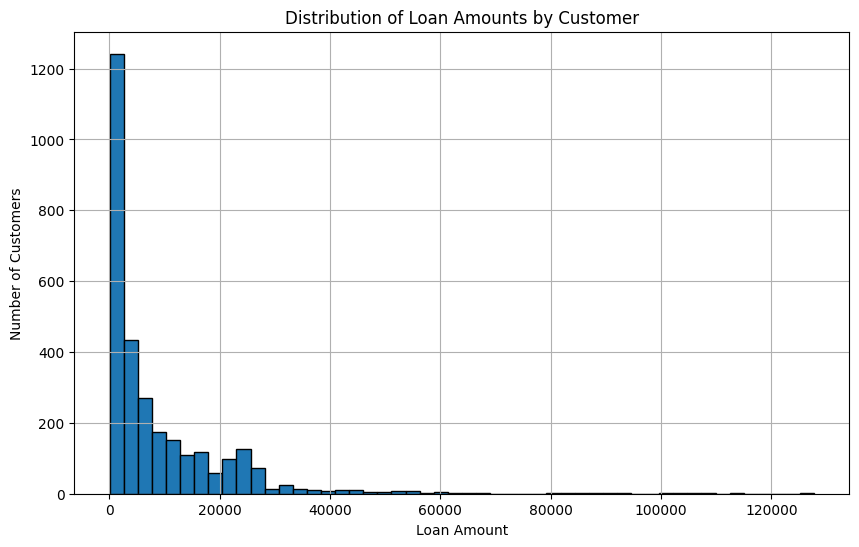

In [14]:
loan_by_customer = pd.read_sql_query("""
SELECT 
    new_customer_id, 
    SUM(loan_amount) AS total_loan_amount
FROM disbursements
GROUP BY new_customer_id;""", conn)


# Plot the loan amount distribution
plt.figure(figsize=(10,6))
plt.hist(loan_by_customer['total_loan_amount'], bins=50, edgecolor='black')
plt.title('Distribution of Loan Amounts by Customer')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [15]:
# Show summary statistics of loan amounts per customer
loan_by_customer_stats = loan_by_customer['total_loan_amount'].describe()
loan_by_customer_stats

count      2996.000000
mean       8882.561415
std       12253.852366
min          70.000000
25%        1140.000000
50%        4045.000000
75%       12302.500000
max      127760.000000
Name: total_loan_amount, dtype: float64

### Loan Amount by Tenure

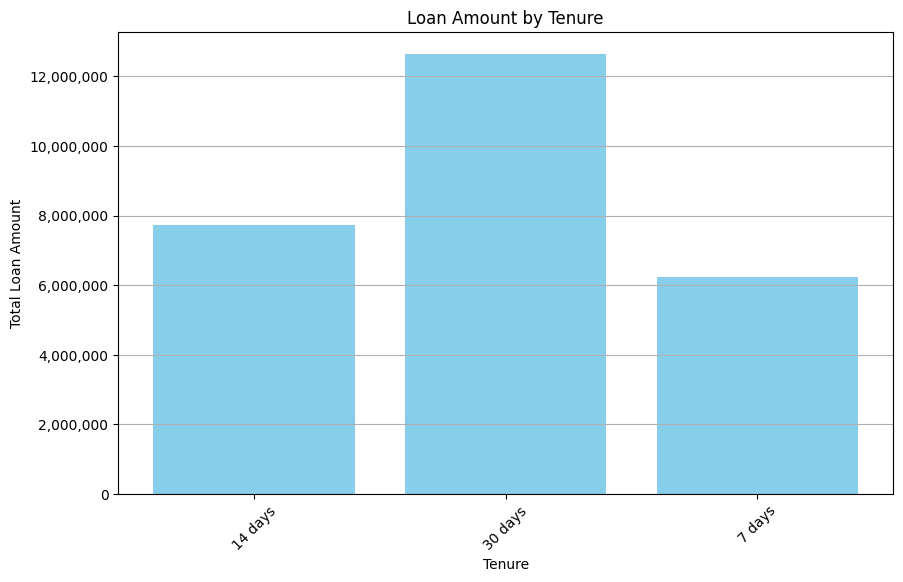

In [16]:
loan_by_tenure = pd.read_sql_query("""
SELECT 
    tenure, 
    SUM(loan_amount) AS total_loan_amount
FROM disbursements
GROUP BY tenure;""", conn)

# Plot the loan amount by tenure
plt.figure(figsize=(10,6))
plt.bar(loan_by_tenure['tenure'], loan_by_tenure['total_loan_amount'], color='skyblue')
plt.title('Loan Amount by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Total Loan Amount')

# Format the y-axis to show full loan amounts
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')  # Adds commas for thousands, no decimal points
plt.gca().yaxis.set_major_formatter(formatter)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display grid for y-axis
plt.grid(True, axis='y')

# Show the plot
plt.show()

In [17]:
# Show summary statistics of loan amounts by tenure
loan_by_tenure_stats = loan_by_tenure['total_loan_amount'].describe()

# Format the summary statistics for better readability
formatted_stats = loan_by_tenure_stats.apply(lambda x: f'{x:,.0f}' if isinstance(x, (int, float)) else x)

# Print the formatted summary statistics
print(formatted_stats)

count             3
mean      8,870,718
std       3,350,877
min       6,231,853
25%       6,985,678
50%       7,739,503
75%      10,190,150
max      12,640,798
Name: total_loan_amount, dtype: object


### Repayment Trends Over Time

In [18]:
total_repayment = pd.read_sql_query("""
SELECT 
    SUM(amount) AS total_loan_amount,
    COUNT(DISTINCT new_customer_id) AS total_customers
FROM repayments;""", conn)

total_repayment      # Disbursement customers 2996 and repayments 2995. 1 customer has NULL repayments

,total_loan_amount,total_customers
0,30503130.33,2995


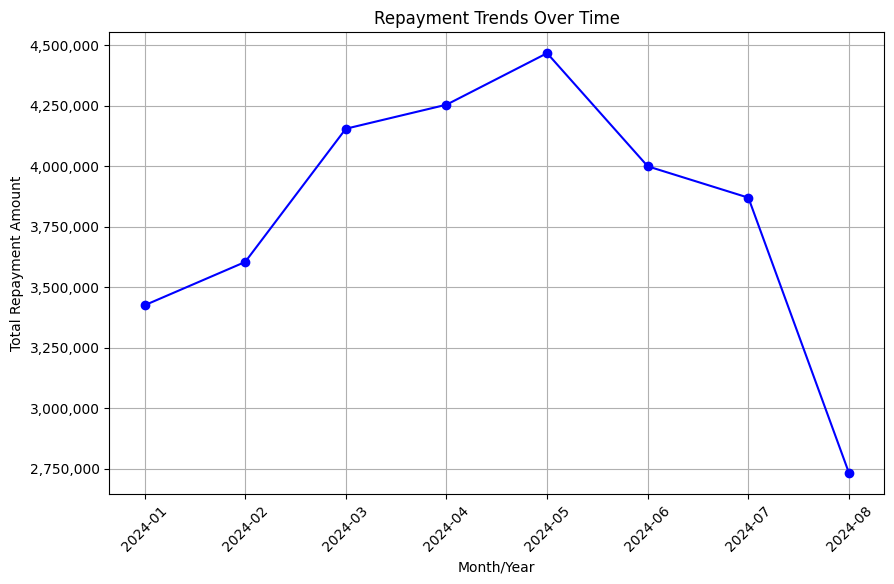

In [19]:
repayment_trends = pd.read_sql_query("""
SELECT 
    strftime('%Y-%m', date_time) AS month_year,  -- Extract year and month from 'date_time'
    SUM(amount) AS total_repayment               -- Sum the repayment amount for each month
FROM repayments
GROUP BY month_year                             -- Group the results by month_year
ORDER BY month_year;                            -- Order the results by month_year
""", conn)

# Plot the repayment trends over time
plt.figure(figsize=(10,6))
plt.plot(repayment_trends['month_year'], repayment_trends['total_repayment'], marker='o', color='b')
plt.title('Repayment Trends Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Total Repayment Amount')

# Format the y-axis to show full loan amounts
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')  # Adds commas for thousands, no decimal points
plt.gca().yaxis.set_major_formatter(formatter)

# Display grid for y-axis
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Repayment by Customer

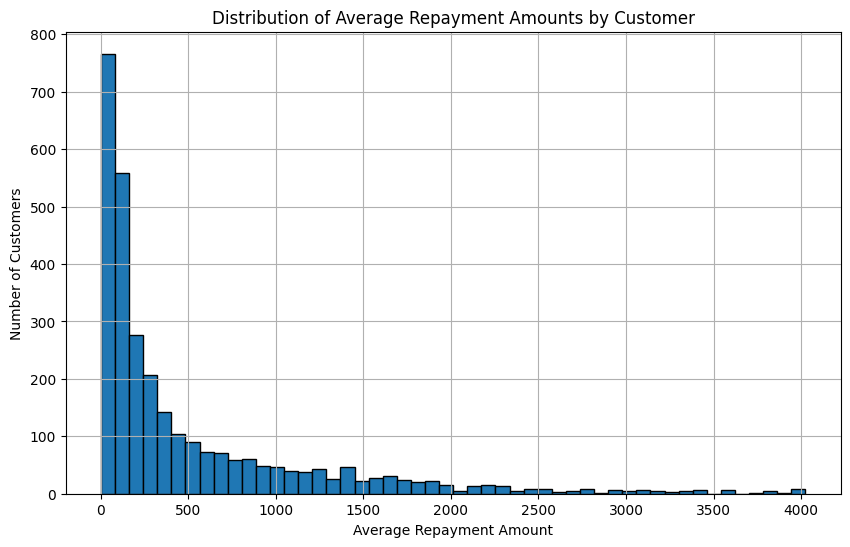

In [20]:
repayment_by_customer = pd.read_sql_query("""
SELECT 
    new_customer_id,
    AVG(amount) AS average_repayment
FROM repayments
GROUP BY new_customer_id;""",conn)


# Plot the average repayment per customer
plt.figure(figsize=(10,6))
plt.hist(repayment_by_customer['average_repayment'], bins=50, edgecolor='black')
plt.title('Distribution of Average Repayment Amounts by Customer')
plt.xlabel('Average Repayment Amount')

# Format the y-axis to show full loan amounts
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')  # Adds commas for thousands, no decimal points
plt.gca().yaxis.set_major_formatter(formatter)

plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

In [21]:
# Show summary statistics of repayment by customer
repayment_by_customer_stats = repayment_by_customer['average_repayment'].describe()
print(repayment_by_customer_stats)

count    2995.000000
mean      516.940548
std       696.550770
min         0.100000
25%        78.646667
50%       210.833333
75%       677.417147
max      4025.000000
Name: average_repayment, dtype: float64


### Loan Amount vs. Repayment Amount

In [22]:
# Join disbursements and repayments to compare total loan amounts vs. total repayment amounts per customer
disbursed_vs_repayment_by_customer = pd.read_sql_query("""
SELECT 
    d.new_customer_id,                                                  
    SUM(d.loan_amount) AS total_loan_amount,
    SUM(r.amount) AS total_repayment
FROM disbursements d
LEFT JOIN repayments r ON d.new_customer_id = r.new_customer_id
GROUP BY d.new_customer_id;""",conn)

disbursed_vs_repayment_by_customer.head()

,new_customer_id,total_loan_amount,total_repayment
0,1,157740,86301.0
1,2,24750,15249.0
2,3,7325500,2124965.4
3,4,1068550,226100.0
4,5,82460,60009.6


### Repayment Performance

In [23]:
ontime_vs_late_repayments = pd.read_sql_query("""
WITH repayment_status AS (
    SELECT 
        r.new_customer_id,
        r.amount,
        r.repayment_type,
        d.disb_date,
        r.date_time AS repayment_date,
        d.tenure_days,
        -- Calculate the expected repayment date
        DATE(d.disb_date, '+' || d.tenure_days || ' days') AS expected_repayment_date,
        -- Determine whether the repayment is on-time or late
        CASE
            WHEN r.date_time <= DATE(d.disb_date, '+' || d.tenure_days || ' days') THEN 'On-Time'
            ELSE 'Late'
        END AS repayment_status
    FROM repayments r
    JOIN disbursements d ON r.new_customer_id = d.new_customer_id
)
-- Now, count the on-time vs late repayments and total repayments per customer
SELECT 
    new_customer_id,
    COUNT(CASE WHEN repayment_status = 'On-Time' THEN 1 END) AS on_time_repayments,
    COUNT(CASE WHEN repayment_status = 'Late' THEN 1 END) AS late_repayments,
    COUNT(*) AS total_repayments -- Count the total number of repayments per customer
FROM repayment_status
GROUP BY new_customer_id;
""", conn)

ontime_vs_late_repayments.head()

,new_customer_id,on_time_repayments,late_repayments,total_repayments
0,1,247,248,495
1,2,136,189,325
2,3,1030,1063,2093
3,4,210,134,344
4,5,300,289,589


### Product Performance Evaluation

In [24]:
# Total disbursed vs total repaid across all customers
totaldisbursed_vs_totalrepaid = pd.read_sql_query("""
SELECT 
    SUM(d.loan_amount) AS total_disbursed,
    SUM(r.amount) AS total_repaid
FROM disbursements d
LEFT JOIN repayments r ON d.new_customer_id = r.new_customer_id;""",conn)

totaldisbursed_vs_totalrepaid.head()

,total_disbursed,total_repaid
0,845183987,3.556745e+08


### Loan repayment ratio (Total repaid vs disbursed)

In [25]:
# SELECT 
#     d.customer_id,
#     SUM(d.loan_amount) AS total_loan_amount,
#     SUM(r.amount) AS total_repayment,
#     (SUM(r.amount) / SUM(d.loan_amount)) AS repayment_ratio
# FROM disbursements d
# LEFT JOIN repayments r ON d.customer_id = r.customer_id
# GROUP BY d.customer_id
# HAVING repayment_ratio < 1;


# Repayment ratio: This query calculates the repayment ratio for each customer (total repayment / total disbursed). 
# If the ratio is less than 1, it indicates that the customer has not fully repaid the loan.

### Customer Segment Analysis

In [26]:
# # Categorize customers based on loan amount and repayment status
# SELECT 
#     d.customer_id,
#     SUM(d.loan_amount) AS total_loan_amount,
#     SUM(CASE WHEN r.repayment_type = 'ON_TIME' THEN 1 ELSE 0 END) AS on_time_repayments,
#     SUM(CASE WHEN r.repayment_type = 'LATE' THEN 1 ELSE 0 END) AS late_repayments,
#     CASE 
#         WHEN SUM(d.loan_amount) > 10000 THEN 'High Loan Amount'
#         WHEN SUM(d.loan_amount) <= 10000 THEN 'Low Loan Amount'
#     END AS loan_segment,
#     CASE 
#         WHEN SUM(CASE WHEN r.repayment_type = 'LATE' THEN 1 ELSE 0 END) > 2 THEN 'High Risk'
#         ELSE 'Low Risk'
#     END AS risk_level
# FROM disbursements d
# LEFT JOIN repayments r ON d.customer_id = r.customer_id
# GROUP BY d.customer_id;

### Risk Assessment

In [27]:
# # Identify high-risk customers based on repayment patterns (late repayments)
# SELECT 
#     d.customer_id,
#     SUM(d.loan_amount) AS total_loan_amount,
#     SUM(CASE WHEN r.repayment_type = 'LATE' THEN 1 ELSE 0 END) AS late_repayments,
#     CASE 
#         WHEN SUM(CASE WHEN r.repayment_type = 'LATE' THEN 1 ELSE 0 END) > 2 THEN 'High Risk'
#         ELSE 'Low Risk'
#     END AS risk_level
# FROM disbursements d
# LEFT JOIN repayments r ON d.customer_id = r.customer_id
# GROUP BY d.customer_id
# HAVING risk_level = 'High Risk';


# High-risk customers: This query identifies customers who have a high number of late repayments, marking them as high risk.

# Recommended credit risk strategies: Based on the results, strategies could include offering adjusted loan terms, higher interest rates for high-risk customers, or more stringent credit checks.

### PREDICTIVE MODELLING

### Actionable Recommendations

#### **Loan Product Performance**
- **Recommendation**: Provide strategies to improve repayment rates and product profitability.

#### **Credit Risk Mitigation**
- **Recommendation**: Suggest strategies for mitigating credit risk based on repayment behavior.

#### **Customer Segmentation and Targeted Strategies**
- **Recommendation**: Propose tailored strategies for different customer segments (e.g., high-risk customers, large-loan customers).

#### **Optimization of Loan Fees**
- **Recommendation**: Analyze and recommend adjustments to loan fees to improve profitability without discouraging repayments.

### **Conclusion**
- **Summary**: Summarize the insights and key findings from the analysis and present actionable recommendations to the leadership team.

In [28]:
# # Save the cleaned excel files as csv


In [29]:
# # Close the connection
# conn.commit()  # Save changes (if any)
# conn.close()